# Setup

In [1]:
import json
import os
from io import StringIO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Loading in general configuration
with open('../config.json', 'r') as f:
    config = json.load(f)

# Getting filepaths
gdrive_fp = config['gdrive_path']
LIFE_fp = config['LIFE_folder']
dataset_fp = config['datasets_path']
benitez_lopez2019 = config['indiv_data_paths']['benitez_lopez2019']

data_path = os.path.join(gdrive_fp, LIFE_fp, dataset_fp, benitez_lopez2019)

# Defining hurdle model

# Reading and exploring data

In [3]:
# Removing the non-UTF-8 characters present in the CSV file
data = ''

with open(data_path, 'rb') as f:
    for line in f:
        line = line.decode('utf-8', 'ignore')
        data += line

In [4]:
# Reading in as a pandas dataframe
ben_lop2019 = pd.read_csv(StringIO(data))
ben_lop2019.head()

,Reference,Study,Order,Family,Species,ratio,RR,X,Y,Region,Country,BM,Diet,DistKm,Reserve,TravTime,LivestockBio,Stunting,PopDens,Literacy
0,"Laurance et al., 2006",1,Cetartiodactyla,Bovidae,"Cephalophus callipygus, C. dorsalis, C. leucog...",0.377193,-0.974594,9.839,-1.916,Africa,Gabon,17.07,Herb,0.05,No,755.8,39.25948,22.0,0.86,81.8
1,"Laurance et al., 2006",1,Proboscidea,Elephantidae,Loxodonta africana,0.865690,-0.144053,9.839,-1.916,Africa,Gabon,3940.03,Herb,0.05,No,755.8,39.25948,22.0,0.86,81.8
2,"Laurance et al., 2006",1,Cetartiodactyla,Bovidae,"Cephalophus callipygus, C. dorsalis, C. leucog...",0.833333,-0.182139,9.839,-1.916,Africa,Gabon,17.07,Herb,0.30,No,755.8,39.25948,22.0,0.86,81.8
3,"Laurance et al., 2006",1,Proboscidea,Elephantidae,Loxodonta africana,0.900862,-0.104234,9.839,-1.916,Africa,Gabon,3940.03,Herb,0.30,No,755.8,39.25948,22.0,0.86,81.8
4,"Laurance et al., 2006",1,Cetartiodactyla,Bovidae,"Cephalophus callipygus, C. dorsalis, C. leucog...",0.956140,-0.044691,9.839,-1.916,Africa,Gabon,17.07,Herb,0.60,No,755.8,39.25948,22.0,0.86,81.8


In [5]:
# Checking basic info
num_species = len(ben_lop2019['Species'].unique())
print(f'{num_species} species')

print(f'{len(ben_lop2019)} effect sizes')

num_studies = len(ben_lop2019['Study'].unique())
print(f'{num_studies} studies')

296 species
3281 effect sizes
163 studies


## Exploring taxonomic representation

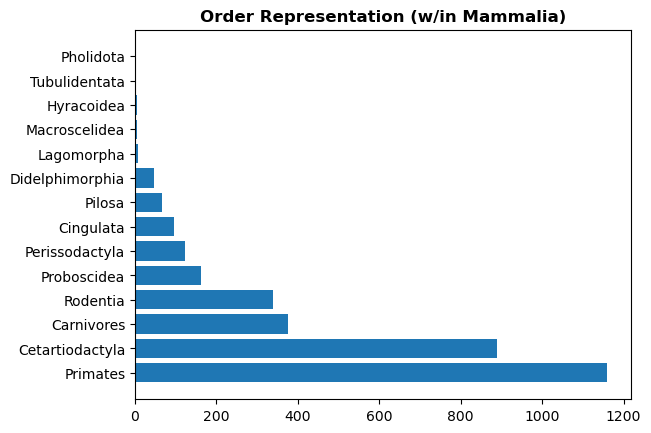

In [6]:
order_counts = ben_lop2019['Order'].value_counts()

plt.barh(order_counts.index, order_counts.values)
plt.title('Order Representation (w/in Mammalia)', weight = 'bold');

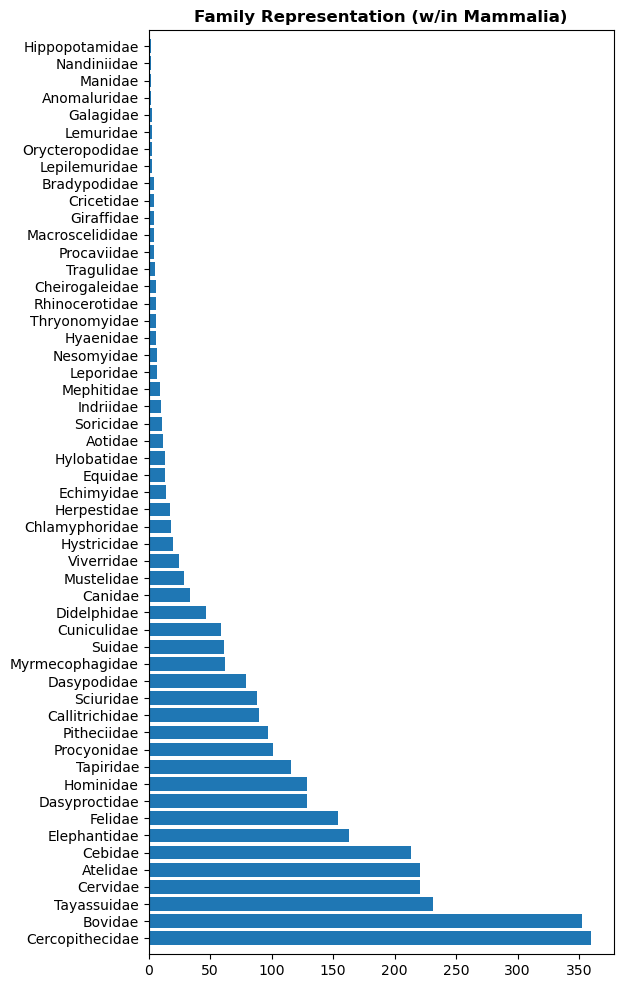

In [7]:
fam_counts = ben_lop2019['Family'].value_counts()

plt.figure(figsize = (6, 12))

plt.barh(fam_counts.index, fam_counts.values)
plt.title('Family Representation (w/in Mammalia)', weight = 'bold')

plt.margins(y = 0.01);

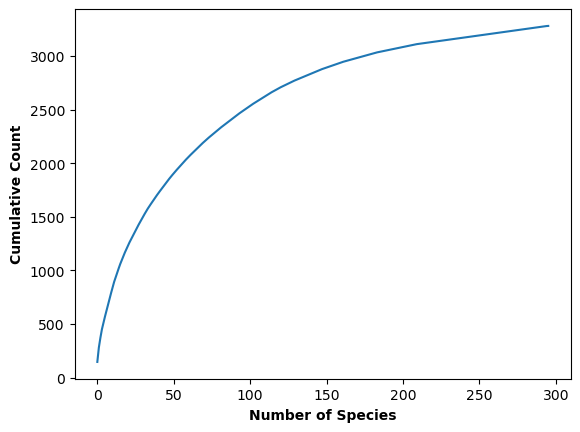

In [8]:
species_counts = ben_lop2019['Species'].value_counts()
species_cumsum = species_counts.to_numpy().cumsum()

plt.plot(species_cumsum)

plt.ylabel('Cumulative Count', weight = 'bold')
plt.xlabel('Number of Species', weight = 'bold');

## Exploring spatial representation

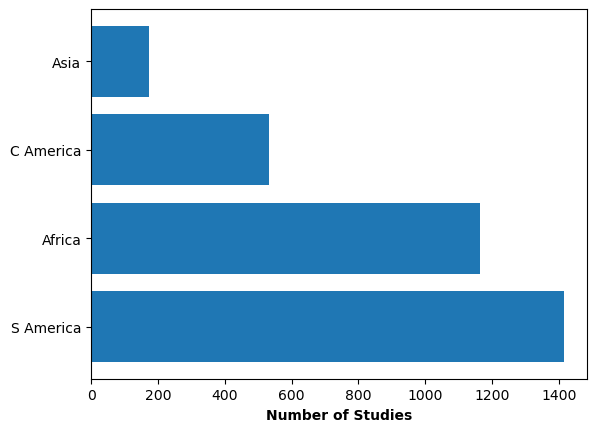

In [9]:
region_counts = ben_lop2019['Region'].value_counts()

plt.barh(region_counts.index, region_counts)
plt.xlabel('Number of Studies', weight = 'bold');

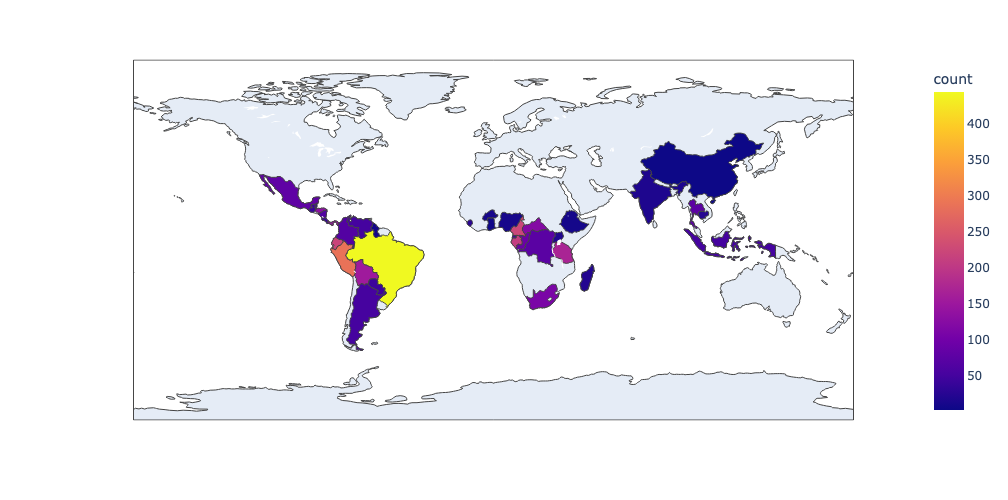

In [20]:
# Plotting distribution of effect sizes across countries
country_counts = ben_lop2019['Country'].value_counts().to_frame().reset_index()

fig = px.choropleth(country_counts, 
                    locations = 'Country',
                    locationmode = 'country names',
                    color = 'count', 
                    hover_name = 'Country', 
                    color_continuous_scale = px.colors.sequential.Plasma, 
                    width = 1000,
                    height = 500)
fig.show()